In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pd.set_option('display.max_columns',100)

In [33]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\MachineLearning\Parkinsson disease.csv')

In [34]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


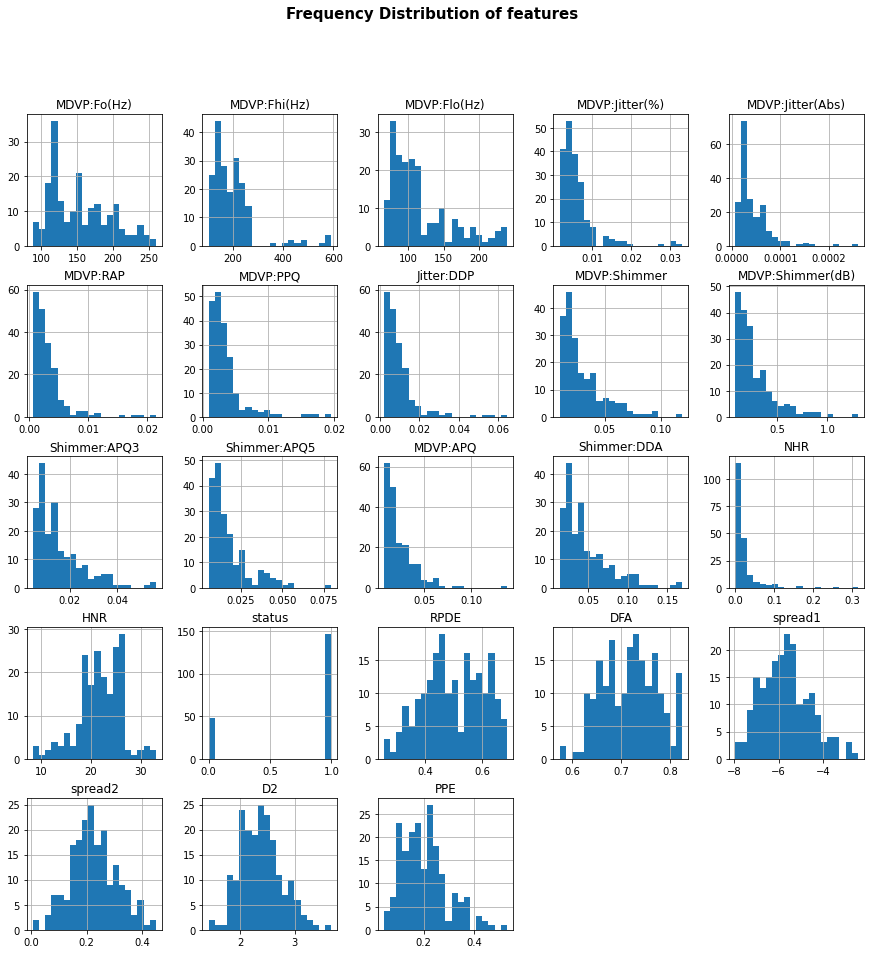

In [35]:
df.hist(bins=20,figsize=(15,15))
plt.suptitle('Frequency Distribution of features',size=15,fontweight='bold')
plt.show()

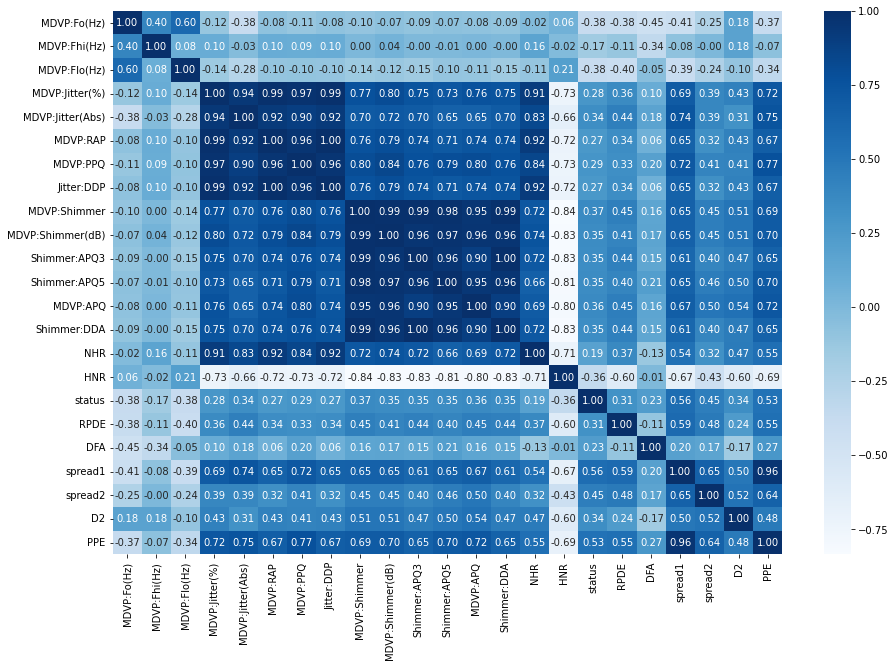

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64


In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.show()

print(df.corr()['status'].sort_values(ascending=False))

In [37]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [38]:
df.groupby('status').mean().T

status,0,1
MDVP:Fo(Hz),181.937771,145.180762
MDVP:Fhi(Hz),223.636750,188.441463
MDVP:Flo(Hz),145.207292,106.893558
MDVP:Jitter(%),0.003866,0.006989
MDVP:Jitter(Abs),0.000023,0.000051
MDVP:RAP,0.001925,0.003757
MDVP:PPQ,0.002056,0.003900
Jitter:DDP,0.005776,0.011273
MDVP:Shimmer,0.017615,0.033658
MDVP:Shimmer(dB),0.162958,0.321204


In [39]:
X=df.drop(columns=['name','status'])
Y=df['status']

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

### Data standardization 

In [41]:
scaler=StandardScaler()

In [42]:
scaler.fit(xtrain)

StandardScaler()

In [43]:
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

### define model

In [44]:
model1=svm.SVC(kernel='linear')
model2=LogisticRegression()
model3=DecisionTreeClassifier()

### model evaluation 

In [45]:
models=[model1,model2,model3]
for i,model in enumerate(models,start=1):
    model.fit(xtrain,ytrain)
    
    xtrain_prediction=model.predict(xtrain)
    train_accuracy_score=accuracy_score(xtrain_prediction,ytrain)
    
    xtest_prediction=model.predict(xtest)
    test_accuracy_score=accuracy_score(xtest_prediction,ytest)
    
    print(f'model{i}',f'train accuracy score: {train_accuracy_score}',f'test accuracy score: {test_accuracy_score}')


model1 train accuracy score: 0.8974358974358975 test accuracy score: 0.8974358974358975
model2 train accuracy score: 0.8717948717948718 test accuracy score: 0.8461538461538461
model3 train accuracy score: 1.0 test accuracy score: 0.8461538461538461
